<a href="https://colab.research.google.com/github/paulosrl/AnaliseGrafos/blob/main/data_virtus_netsci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Análise de rede usando Networkx

Average Degree: 2.0
Average Clustering Coefficient: 0.0
Graph Density (%): 2.0202020202020203
Degree of node 15: 1
Clustering coefficient of node 15: 0


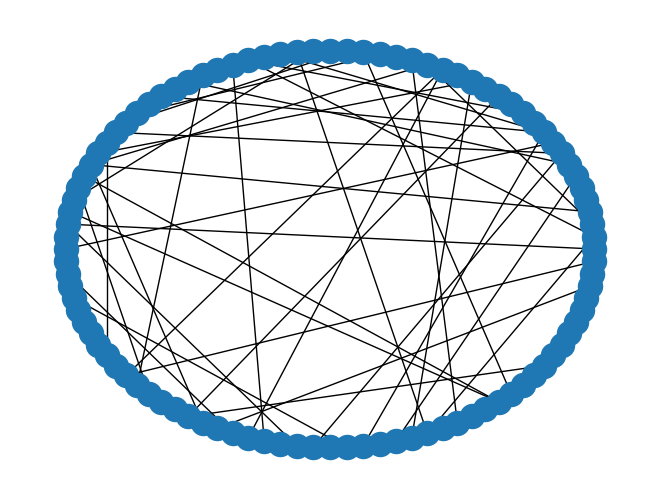

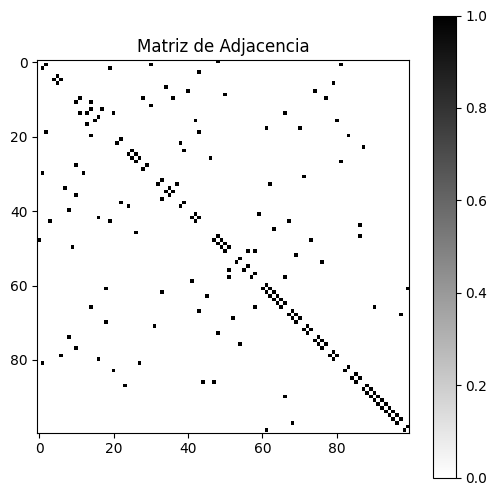

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G1 = nx.connected_watts_strogatz_graph(100, 3, 0.5, tries=1000, seed=random.seed(0))
nx.draw(G1,with_labels=False,pos=nx.circular_layout(G1))

# Calculate degree
degree_dict = dict(G1.degree())
average_degree = sum(degree_dict.values()) / len(degree_dict)

# Calculate clustering coefficient
clustering_coefficient = nx.clustering(G1)
average_clustering_coefficient = sum(clustering_coefficient.values()) / len(clustering_coefficient)

# Calculate graph density
num_nodes = len(G1.nodes())
num_edges = len(G1.edges())
density = 100*2 * num_edges / (num_nodes * (num_nodes - 1))

print("Average Degree:", average_degree)
print("Average Clustering Coefficient:", average_clustering_coefficient)
print("Graph Density (%):", density)

# Specify the node of interest
node_of_interest = 15

# Calculate degree of the specified node
degree = G1.degree(node_of_interest)

# Calculate clustering coefficient of the specified node
clustering = nx.clustering(G1, node_of_interest)

print(f"Degree of node {node_of_interest}: {degree}")
print(f"Clustering coefficient of node {node_of_interest}: {clustering}")

# Calculate the adjacency matrix
adj_matrix = nx.to_numpy_array(G1)

# Plot the adjacency matrix
plt.figure(figsize=(6, 6))
plt.imshow(adj_matrix, cmap='binary', interpolation='none')
plt.title("Matriz de Adjacencia")
plt.colorbar()
plt.show()

Caracterização (densidade, clustering, número de vértices a arestas)

Average Shortest Path Length: 3.448080808080808


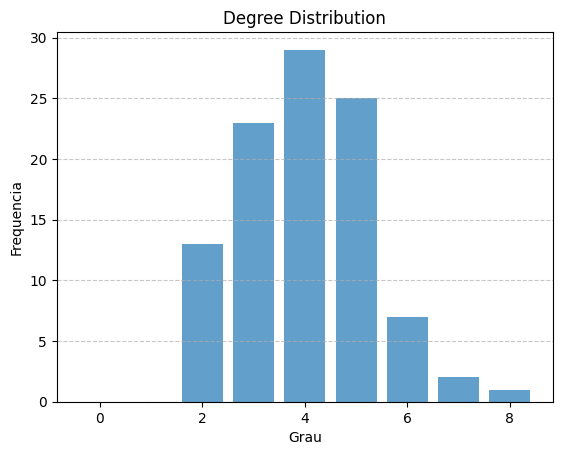

The network exhibits small-world properties.


In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

G1 = nx.connected_watts_strogatz_graph(100, 4, 1, tries=10000, seed=random.seed(0))

# Calculate tha average shortest path length
average_shortest_path_length = nx.average_shortest_path_length(G1)

print("Average Shortest Path Length:", average_shortest_path_length)

# Calculate the degree distribution
degree_sequence = [d for n, d in G1.degree()]

# Plot the degree distribution
plt.hist(degree_sequence, bins=range(max(degree_sequence) + 2), align='left', alpha=0.7, rwidth=0.8)
plt.xlabel('Grau')
plt.ylabel('Frequencia')
plt.title('Degree Distribution')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#To determine if a network is a "small-world" network, you can calculate its average clustering coefficient
#and compare it to the clustering coefficient of a random network with the same number of nodes and edges.
#A small-world network typically has a high clustering coefficient like a regular network and a short average
#path length like a random network.

# Check if the graph is connected
if not nx.is_connected(G1):
    print("The graph is disconnected. Consider working with a connected subgraph.")
else:
    # Calculate the clustering coefficient of the actual network
    C_real = nx.average_clustering(G1)

    # Calculate the average shortest path length of the actual network
    L_real = nx.average_shortest_path_length(G1)

    # Create an equivalent random graph
    N = len(G1.nodes())
    k_avg = sum(dict(G1.degree()).values()) / N
    random_graph = nx.random_graphs.erdos_renyi_graph(N, k_avg / (N - 1))

    # Check if the random graph is connected (optional)
    if not nx.is_connected(random_graph):
        print("The random graph is disconnected. Consider generating a connected random graph.")
    else:
        # Calculate the clustering coefficient of the random graph
        C_random = nx.average_clustering(random_graph)

        # Calculate the average shortest path length of the random graph
        L_random = nx.average_shortest_path_length(random_graph)

        # Calculate the small-world coefficient (sigma)
        sigma = (C_real / C_random) / (L_real / L_random)

        # Compare sigma to a threshold (e.g., 1.0) to determine if it's a small-world network
        if sigma > 1.0:
            print("The network exhibits small-world properties.")
        else:
            print("The network does not exhibit small-world properties.")

In [ ]:
import networkx as nx
import math

# Create a graph (replace this with your own graph)
#G1 = nx.Graph()
#G1.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5),(1,4)])
G1 = nx.connected_watts_strogatz_graph(100, 4, 1, tries=10000, seed=random.seed(0))


# Calculate the number of vertices (N)
N = len(G1.nodes())

# Calculate the average degree (<k>)
k_avg = sum(dict(G1.degree()).values()) / N

# Calculate the logarithm of N and <k>
log_N = math.log(N)
log_k_avg = math.log(k_avg)

#Calculate the average distance
avg_distance = nx.average_shortest_path_length(G1)

sigma=log_N/log_k_avg

if avg_distance/sigma < 0.01 or avg_distance/sigma > 10:
  print("The network does not exhibit small-world properties.")
else:
  print("The network exhibits small-world properties.")

The network exhibits small-world properties.


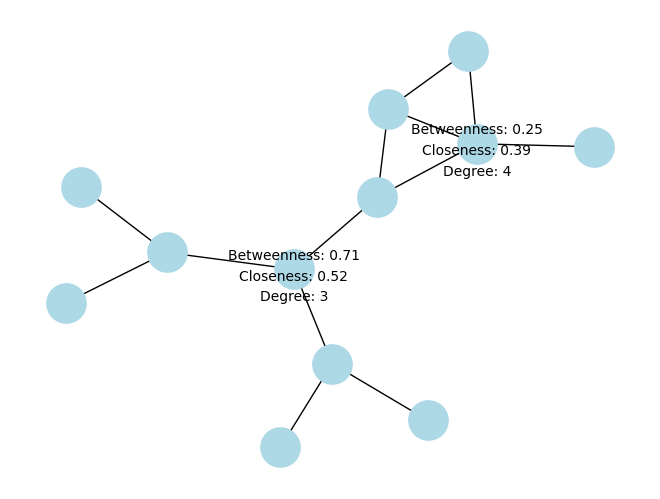

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2,3), (3,4), (2,5),(3,4),(4,5),(7,8),(8,9),(10,11),(10,12),(6,5),(6,10),(6,8),(2,4)])

# Node for which we want to calculate centrality measures
node_to_analyze = 6
node_to_analyze1 = 2

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G1)
betweenness_value = betweenness_centrality[node_to_analyze]
betweenness_value1 = betweenness_centrality[node_to_analyze1]

# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G1)
closeness_value = closeness_centrality[node_to_analyze]
closeness_value1 = closeness_centrality[node_to_analyze1]

# Degree Centrality
degree = len(list(G1.neighbors(node_to_analyze)))
degree1 = len(list(G1.neighbors(node_to_analyze1)))

# Create a layout for the nodes
pos = nx.kamada_kawai_layout(G1)

# Draw the graph
nx.draw(G1, pos, with_labels=True, node_color='lightblue', node_size=800, font_size=10)

# Add labels for centrality measures
plt.text(pos[node_to_analyze][0], pos[node_to_analyze][1] + 0.05, f'Betweenness: {betweenness_value:.2f}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze][0], pos[node_to_analyze][1] - 0.05, f'Closeness: {closeness_value:.2f}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze][0], pos[node_to_analyze][1] - 0.15, f'Degree: {degree}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze1][0], pos[node_to_analyze1][1] + 0.05, f'Betweenness: {betweenness_value1:.2f}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze1][0], pos[node_to_analyze1][1] - 0.05, f'Closeness: {closeness_value1:.2f}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze1][0], pos[node_to_analyze1][1] - 0.15, f'Degree: {degree1}', fontsize=10, ha='center')
# Show the plot
plt.show()


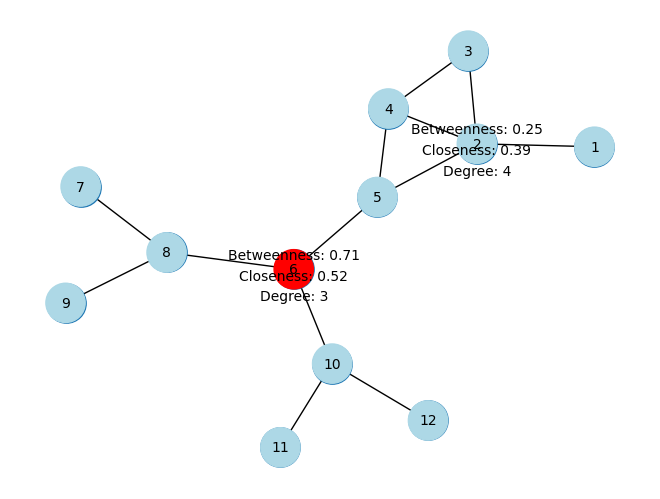

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2,3), (3,4), (2,5),(3,4),(4,5),(7,8),(8,9),(10,11),(10,12),(6,5),(6,10),(6,8),(2,4)])

# Node for which we want to calculate centrality measures
node_to_analyze = 6
node_to_analyze1 = 2

# Calculate Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G1)
betweenness_value = betweenness_centrality[node_to_analyze]
betweenness_value1 = betweenness_centrality[node_to_analyze1]

# Calculate Closeness Centrality
closeness_centrality = nx.closeness_centrality(G1)
closeness_value = closeness_centrality[node_to_analyze]
closeness_value1 = closeness_centrality[node_to_analyze1]

# Degree Centrality
degree = len(list(G1.neighbors(node_to_analyze)))
degree1 = len(list(G1.neighbors(node_to_analyze1)))

# Create a layout for the nodes
pos = nx.kamada_kawai_layout(G1)

# Draw the graph
nx.draw(G1, pos, with_labels=True, node_size=800, font_size=10)

# Set node colors (lightblue for most nodes, red for the node to analyze)
node_colors = ['lightblue' if node != node_to_analyze else 'red' for node in G1.nodes()]
nx.draw_networkx_nodes(G1, pos, node_color=node_colors, node_size=800)

# Add labels for centrality measures
plt.text(pos[node_to_analyze][0], pos[node_to_analyze][1] + 0.05, f'Betweenness: {betweenness_value:.2f}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze][0], pos[node_to_analyze][1] - 0.05, f'Closeness: {closeness_value:.2f}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze][0], pos[node_to_analyze][1] - 0.15, f'Degree: {degree}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze1][0], pos[node_to_analyze1][1] + 0.05, f'Betweenness: {betweenness_value1:.2f}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze1][0], pos[node_to_analyze1][1] - 0.05, f'Closeness: {closeness_value1:.2f}', fontsize=10, ha='center')
plt.text(pos[node_to_analyze1][0], pos[node_to_analyze1][1] - 0.15, f'Degree: {degree1}', fontsize=10, ha='center')

# Show the plot
plt.show()


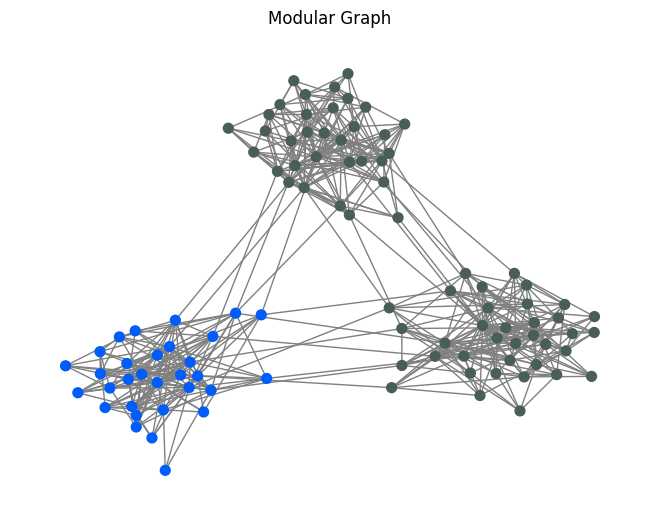

Modularity: 0.4020


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Generate a modular graph with specified parameters, increased min_community, and min_degree
n = 100  # Total number of nodes
tau1 = 3.0  # Power law exponent for the degree distribution of the first community
tau2 = 2.0  # Power law exponent for the degree distribution of the second community
mu = 0.05  # Fraction of intra-community edges

# Create a dict to specify parameters
params = {
    'n': n,
    'tau1': tau1,
    'tau2': tau2,
    'mu': mu,
    'min_community': 30,  # Increased minimum size of a community
    'min_degree': 5,      # Minimum degree of nodes in the graph
    'seed': 10
}

G = nx.LFR_benchmark_graph(**params)

# Remove self-loops
self_loops = list(nx.selfloop_edges(G))
G.remove_edges_from(self_loops)

# Calculate modularity using the Louvain algorithm
partition = nx.community.label_propagation_communities(G)
modularity_value = nx.community.quality.modularity(G, partition)

# Create a color map for communities
community_colors = {}
for i, community in enumerate(partition):
    color = (random.random(), random.random(), random.random())  # Generate a random color for each community
    for node in community:
        community_colors[node] = color

# Plot the modular graph with community-specific colors
node_colors = [community_colors[node] for node in G.nodes()]
pos = nx.spring_layout(G, seed=42)  # Layout the graph using a seed for reproducibility
nx.draw(G, pos, node_size=50, node_color=node_colors, edge_color='gray', with_labels=False)
plt.title("Modular Graph")
plt.show()

# Print the modularity
print(f"Modularity: {modularity_value:.4f}")






Saving teste.csv to teste (1).csv


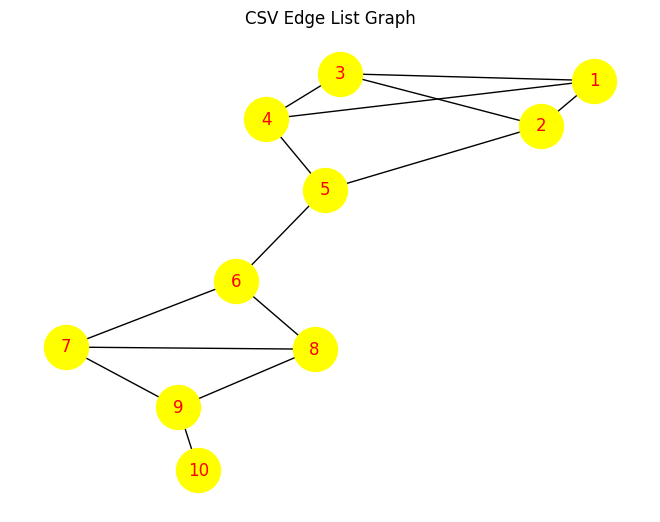

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Upload your CSV file to Google Colab
# You can upload the file manually via the Files tab or use code to upload it.

# If using code to upload the file:
from google.colab import files
uploaded = files.upload()

# Step 2: Read the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the actual name of your CSV file
csv_file_name = 'teste.csv'
df = pd.read_csv(csv_file_name)

# Step 3: Create a NetworkX graph from the DataFrame
# Replace 'Column1' and 'Column2' with the actual column names from your CSV
G = nx.from_pandas_edgelist(df, source='From', target='To')

# Step 4: Plot the graph
pos = nx.spring_layout(G)  # You can use different layouts as well
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='yellow', font_size=12, font_color='red')
plt.title("CSV Edge List Graph")
plt.show()

Saving teste1.csv to teste1 (1).csv


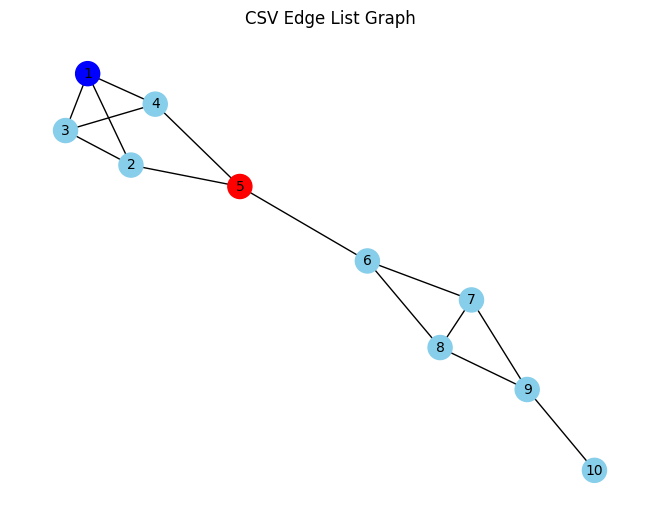

Average Shortest Path Length: 2.62
Mean Degree: 2.80
Network Density: 0.31
Average Clustering Coefficient: 0.40
Is Small World? True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Upload your CSV file to Google Colab
# You can upload the file manually via the Files tab or use code to upload it.

# If using code to upload the file:
from google.colab import files
uploaded = files.upload()

# Find the uploaded CSV file (assuming there's only one file)
csv_file_name = next(iter(uploaded))

# Step 2: Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_name)

# Step 3: Create a NetworkX graph from the DataFrame
# Replace 'From' and 'To' with the actual column names from your CSV
G = nx.from_pandas_edgelist(df, source='From', target='To')

# Calculate network metrics
average_shortest_path_length = nx.average_shortest_path_length(G)
# Cálculo do grau médio
mean_degree = sum(dict(G.degree()).values()) / len(G)
# Cálculo da densidade
network_density = nx.density(G)
#cálculo do coef. de clustering médio
#tem a ver com o capital social e o o quanto os vizinhos de cada nó estão ou não conectados
average_clustering_coefficient = nx.average_clustering(G)

# Check for small-world properties by comparing clustering coefficient to random graphs
random_graph = nx.random_graphs.erdos_renyi_graph(len(G.nodes()), nx.density(G))
random_clustering_coefficient = nx.average_clustering(random_graph)
# verifica se é uma rede pequeno mundo
is_small_world = average_clustering_coefficient > random_clustering_coefficient

# Find nodes with highest centrality measures
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
highest_degree_node = max(dict(G.degree()).items(), key=lambda x: x[1])[0]
highest_betweenness_centrality_node = max(betweenness_centrality.items(), key=lambda x: x[1])[0]
highest_closeness_centrality_node = max(closeness_centrality.items(), key=lambda x: x[1])[0]

# Color the nodes
node_colors = ['red' if node == highest_betweenness_centrality_node else
               'black' if node == highest_closeness_centrality_node else
               'blue' if node == highest_degree_node else 'skyblue'
               for node in G.nodes()]

# Step 4: Plot the graph
pos = nx.spring_layout(G)  # You can use different layouts as well
nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, font_size=10, font_color='black')
plt.title("CSV Edge List Graph")
plt.show()

# Print calculated network metrics and small-world property
print(f"Average Shortest Path Length: {average_shortest_path_length:.2f}")
print(f"Mean Degree: {mean_degree:.2f}")
print(f"Network Density: {network_density:.2f}")
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.2f}")
print(f"Is Small World? {is_small_world}")

Saving teste.csv to teste (20).csv


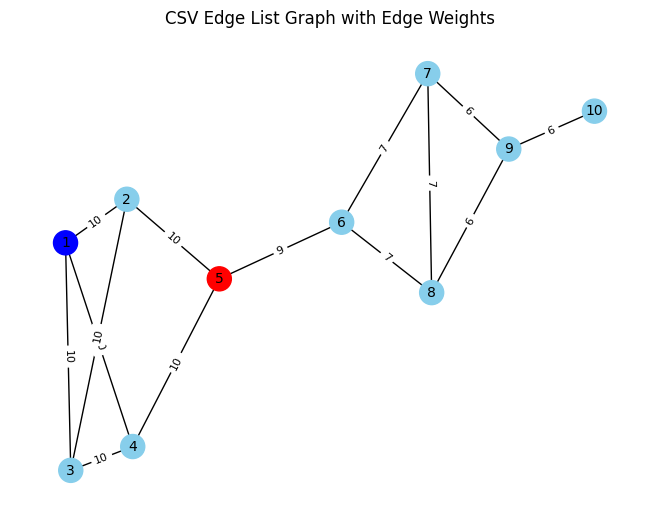

Average Shortest Path Length: 21.78
Mean Degree: 2.80
Network Density: 0.31
Average Clustering Coefficient: 0.40
Is Small World? True


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Upload your CSV file to Google Colab
# You can upload the file manually via the Files tab or use code to upload it.

# If using code to upload the file:
from google.colab import files
uploaded = files.upload()

# Find the uploaded CSV file (assuming there's only one file)
csv_file_name = next(iter(uploaded))
df = pd.read_csv(csv_file_name)

# Step 3: Create a NetworkX graph from the DataFrame with "Sign" as edge weights
# Replace 'From' and 'To' with the actual column names from your CSV
G = nx.Graph()  # Create an empty graph
#inserindo peso nas arestas
for index, row in df.iterrows():
    G.add_edge(row['From'], row['To'], Sign=row['Sign'])  # Add edges with the 'Sign' attribute

# Extract edge weights
edge_weights = [data['Sign'] for u, v, data in G.edges(data=True)]

# Calculate network metrics
average_shortest_path_length = nx.average_shortest_path_length(G, weight='Sign')
mean_degree = sum(dict(G.degree()).values()) / len(G)
network_density = nx.density(G)
average_clustering_coefficient = nx.average_clustering(G)

# Check for small-world properties by comparing clustering coefficient to random graphs
random_graph = nx.random_graphs.erdos_renyi_graph(len(G.nodes()), nx.density(G))
random_clustering_coefficient = nx.average_clustering(random_graph)
is_small_world = average_clustering_coefficient > random_clustering_coefficient

# Find nodes with highest centrality measures
betweenness_centrality = nx.betweenness_centrality(G, weight='Sign')
closeness_centrality = nx.closeness_centrality(G, distance='Sign')
highest_degree_node = max(dict(G.degree(weight='Sign')).items(), key=lambda x: x[1])[0]
highest_betweenness_centrality_node = max(betweenness_centrality.items(), key=lambda x: x[1])[0]
highest_closeness_centrality_node = max(closeness_centrality.items(), key=lambda x: x[1])[0]

# Color the nodes
node_colors = ['red' if node == highest_betweenness_centrality_node else
               'green' if node == highest_closeness_centrality_node else
               'blue' if node == highest_degree_node else 'skyblue'
               for node in G.nodes()]

# Step 4: Plot the graph with edge labels (weights)
pos = nx.spring_layout(G)  # You can use different layouts as well
nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, font_size=10, font_color='black')
edge_labels = {(u, v): w for (u, v, w) in G.edges(data='Sign')}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)
plt.title("CSV Edge List Graph with Edge Weights")
plt.show()

# Print calculated network metrics and small-world property
print(f"Average Shortest Path Length: {average_shortest_path_length:.2f}")
print(f"Mean Degree: {mean_degree:.2f}")
print(f"Network Density: {network_density:.2f}")
print(f"Average Clustering Coefficient: {average_clustering_coefficient:.2f}")
print(f"Is Small World? {is_small_world}")
